In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import pickle

In [42]:
data = pd.read_csv('Churn_Modelling.csv')

# EDA

In [43]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
print("checking nulls:\n", data.isnull().sum())
print("Summary:\n", data.describe())
print("Statistical:\n", data.value_counts())
print("Unique Items: ",data['Gender'].nunique(), "\n", data['Gender'].unique())
print("Unique Items: ",data['Geography'].nunique(), "\n", data['Geography'].unique())

checking nulls:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Summary:
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.00

In [45]:
label_encoder_gender = LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])

encoder = OneHotEncoder(sparse=False)
geo_encoder = encoder.fit_transform(data[['Geography']])
# encoder.get_feature_names_out(['Geography'])------- it help us create feature names from column values
geodata = pd.DataFrame(geo_encoder,columns=encoder.get_feature_names(['Geography']))
data = pd.concat([data,geodata],axis=1)

In [46]:
data = data.drop(columns=['RowNumber','CustomerId','Surname','Geography'],axis=1)

In [47]:
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import statistics

In [48]:
data.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0


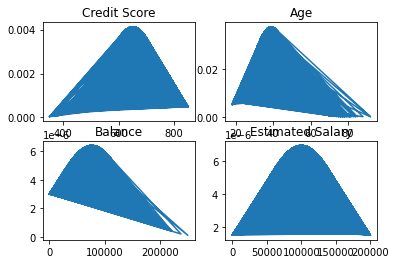

In [49]:
# Normal Distribution charts
fig,axis = plt.subplots(2,2)

# data.describe()

axis[0,0].plot(data['CreditScore'], norm.pdf(data['CreditScore'],
                                             data.describe()['CreditScore']['mean'],
                                             data.describe()['CreditScore']['std']))
axis[0, 0].set_title('Credit Score')

axis[0,1].plot(data['Age'], norm.pdf(data['Age'],
                                             data.describe()['Age']['mean'],
                                             data.describe()['Age']['std']))
axis[0, 1].set_title('Age')

axis[1,0].plot(data['Balance'], norm.pdf(data['Balance'],
                                             data.describe()['Balance']['mean'],
                                             data.describe()['Balance']['std']))
axis[1, 0].set_title('Balance')

axis[1,1].plot(data['EstimatedSalary'], norm.pdf(data['EstimatedSalary'],
                                             data.describe()['EstimatedSalary']['mean'],
                                             data.describe()['EstimatedSalary']['std']))
axis[1, 1].set_title('Estimated Salary')

plt.show()

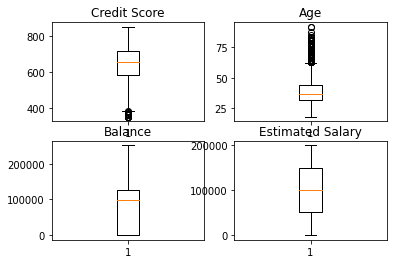

In [50]:
# Boxplot
fig,axis = plt.subplots(2,2)

# data.describe()

axis[0,0].boxplot(data['CreditScore'])
axis[0,0].set_title('Credit Score')

axis[0,1].boxplot(data['Age'])
axis[0,1].set_title('Age')

axis[1,0].boxplot(data['Balance'])
axis[1,0].set_title('Balance')

axis[1,1].boxplot(data['EstimatedSalary'])
axis[1,1].set_title('Estimated Salary')

plt.show()

# When to use what :
<i>standardization </i>

    1. When features have different units: 
    2. For algorithms that rely on distance metrics
    3. When your data follows a Gaussian (normal) distribution


<i>normalization </i>    

    1. When you need to bound your data
    2. For data with varying ranges
    3. When using algorithms that are sensitive to outliers


<i>overall </i>  

    1. Use Standardization when your data is normally distributed and when you’re using models sensitive to the distribution and scale of the data.
    2. Use Normalization when your data needs to be bounded or when working with algorithms sensitive to the scale, like neural networks.

In [51]:
normal = preprocessing.MinMaxScaler()
Cred_scaled = normal.fit_transform(data[['CreditScore']])
Age_scaled = normal.fit_transform(data[['Age']])
Balance_scaled = normal.fit_transform(data[['Balance']])
Sal_scaled = normal.fit_transform(data[['EstimatedSalary']])


# Pickle Use

As we have used one hot encoder and label encoder, we have to save those transformative file in order to transform our future input values. 
To save these transformation we will use pickle, which can used later

In [52]:
# Save the encoders and scalers
# wb is write byte mode

# What is happening here?
    # we are creating file with .pkl extension and here are dumping our transformation, encoder or scaler details using pickle
    # and this will help us later for the transformation to new data using details of train data becuase these file are being created
    # using the help of train data

with(open('label_encoder_gender.pkl','wb')) as file:
    pickle.dump(label_encoder_gender,file)

with(open('encoder.pkl','wb')) as file:
    pickle.dump(encoder,file)


In [53]:
# Divide dataset into dependent and independent features.
y = data['Exited']
x = data.drop('Exited', axis=1)

In [54]:
# Split the data into train and test
    # Shuffle data is suffled before dividing
    # If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated 
        # and the train and test datasets would have different values each time.
    # Stratify = y means dataset will divide propoertion as per the y 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=104, test_size= 0.2, shuffle= True, stratify=y)

In [55]:
# Normalizing whole dataset
# normal_val = normal.fit_transform(data)
# normal_data = pd.DataFrame(normal_val, columns= data.columns)

# Scale these features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [56]:
# save this scaler file using pickle
 
with(open('scaler.pkl','wb')) as file:
    pickle.dump(scaler,file)

In [57]:
# importing the tensorflow package
import tensorflow as tf 
print(tf.test.is_built_with_cuda())
print(tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))
print(tf.config.list_physical_devices('GPU'))

True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Create Model

In [59]:
# ANN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [60]:
x_train.shape

(8000, 12)

In [61]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)), # Hidden Layer1 connected with input layer
    Dense(32,activation='relu'), # Hidden Layer2
    Dense(16,activation='relu'), # Hidden Layer3
    Dense(1,activation='sigmoid') # Output Layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [62]:
## Compile model
# Compilation help us in initializing optimizer,
   # loss and learning rate for backpropogation

# model.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
losss = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer= opt ,loss= losss ,metrics=['accuracy'])


In [63]:
## Setup tensorboard
# to start training and capture log for the visualization

# strftime is used to define in which time format we want to store log
log_dir = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorflow_callback = TensorBoard(log_dir= log_dir, histogram_freq= 1)

In [64]:
## Early stopping
# it help us to stop our training incase we are seeing very little change in loss
# or model already got stagnated

# here we definig to monitor validation loss, and atleast run it for 5 epochs and 
# after this it can take call to early stop and restore the best weights
early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience= 10, restore_best_weights= True)


In [65]:
## Train the model

history = model.fit(x_train,y_train, validation_data=(x_test,y_test), 
                    epochs=100, callbacks=[tensorflow_callback,early_stopping_callback])

Epoch 1/100
250/250 [==============================] - 5s 6ms/step - loss: 0.4058 - accuracy: 0.8241 - val_loss: 0.3522 - val_accuracy: 0.8585
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3620 - accuracy: 0.8526 - val_loss: 0.3554 - val_accuracy: 0.8590
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3502 - accuracy: 0.8544 - val_loss: 0.3502 - val_accuracy: 0.8640
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3491 - accuracy: 0.8554 - val_loss: 0.3458 - val_accuracy: 0.8600
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3430 - accuracy: 0.8569 - val_loss: 0.3557 - val_accuracy: 0.8555
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3410 - accuracy: 0.8599 - val_loss: 0.3444 - val_accuracy: 0.8695
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3394 - accuracy: 0.8605 - val_loss: 0.3446 - val_accuracy: 0.8590

In [66]:
## Save model using .h5 extension

model.save('model.h5')

In [78]:
## Load tensorboard extension

%load_ext tensorboard

%tensorboard --logdir=logs/fit20240921-201817

# Use something like this "http://localhost:6006/#scalars"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 21508), started 0:09:22 ago. (Use '!kill 21508' to kill it.)

Text(0.5, 1.0, 'Validation Accuracy')

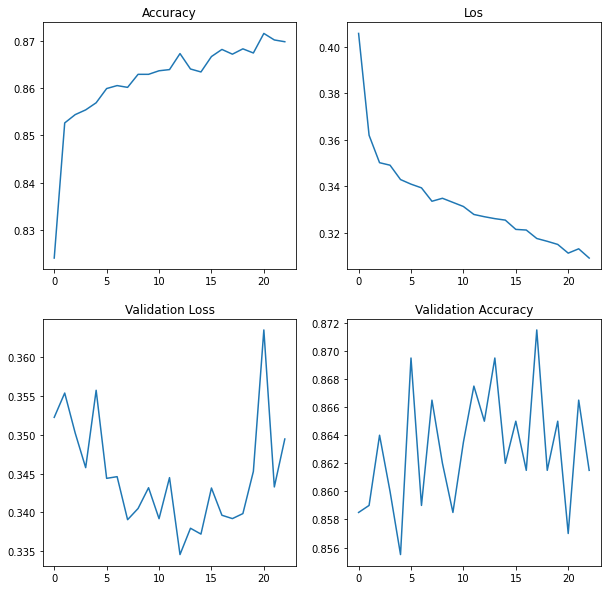

In [77]:
# Looking at difference charts to understand performance of model

history.history.keys()

fig2,axis2 = plt.subplots(2,2, figsize = (10,10))

axis2[0,0].plot(history.history['accuracy'])
axis2[0,0].set_title('Accuracy')
axis2[0,1].plot(history.history['loss'])
axis2[0,1].set_title('Los')
axis2[1,0].plot(history.history['val_loss'])
axis2[1,0].set_title('Validation Loss')
axis2[1,1].plot(history.history['val_accuracy'])
axis2[1,1].set_title('Validation Accuracy')

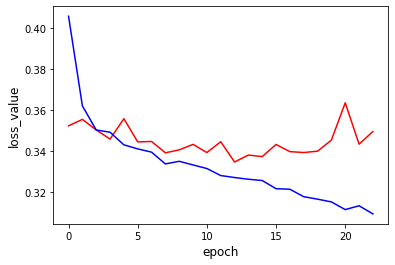

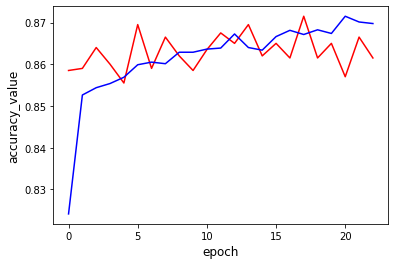

In [79]:
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss_value', fontsize=12)
plt.plot(history.history['val_loss'],color='red')
plt.plot(history.history['loss'],color='blue')
plt.show()
plt.xlabel('epoch', fontsize=12)
plt.ylabel('accuracy_value', fontsize=12)
plt.plot(history.history['val_accuracy'],color='red')
plt.plot(history.history['accuracy'],color='blue')
plt.show()